In [23]:
import openmc
import matplotlib.pyplot as plt
import openmc_source_plotter
import numpy as np
import neutronics_material_maker as nmm

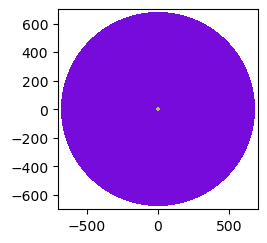

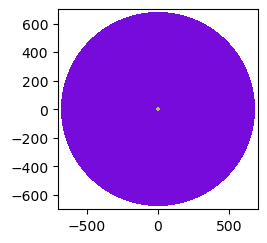

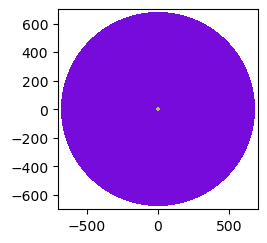

In [47]:
Bi = openmc.Material(name='Bi209')
Bi.add_nuclide('Bi209',1)
'''
air = openmc.Material(name='air')
air.add_nuclide('N2',0.78084,percent_type='ao')
air.add_nuclide('O2',0.209476,percent_type='ao')
air.add_element('Ar',0.0934,percent_type='ao')
air.add_element('C',0.0133,percent_type='ao')
air.set_density('kg/m3', 1.2754)
'''
steel= nmm.Material.from_library('a36_steel').openmc_material


mats = openmc.Materials([Bi])

outer_shell = openmc.Sphere(r=12,)
inner_shell = openmc.Sphere(r=3)

detector_outer_surface = openmc.Sphere(r=680, boundary_type='vacuum')
detector_surface = openmc.Sphere(r=679)


bi_shell = -outer_shell &  +inner_shell


shell_cell = openmc.Cell(region=bi_shell)
shell_cell.fill = Bi

detector_cell = openmc.Cell(region=-detector_surface & +outer_shell)
outer = openmc.Cell(region=-detector_outer_surface & + detector_surface)
outer.fill = steel


universe = openmc.Universe(cells=[shell_cell, detector_cell])

x,y = 1400,1400
plt.show(universe.plot(width=(x, y), basis='xz'))
plt.show(universe.plot(width=(x, y), basis='xy'))
plt.show(universe.plot(width=(x, y), basis='yz'))

geom = openmc.Geometry(universe)

In [7]:
#settings

sett = openmc.Settings()
sett.batches = 10
sett.inactive = 0
sett.particles = 10000
sett.run_mode = 'fixed source'


In [8]:

#create the neutron source T(d,n)
source = openmc.Source()
source.space = openmc.stats.Point((0,0,0))
source.angle = openmc.stats.Isotropic() # not sure if isotropic

source.energy = openmc.stats.Discrete([14e6], [1])

source.particle = 'neutron'
source.plot_source_energy()
sett.source = source

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
#cf source
cf_source = openmc.Source()
cf_source.space = openmc.stats.Point((0,0,0))
cf_source.angle = openmc.stats.Isotropic() #not sure if isotropic
#cf_source.energy = openmc.stats.


In [11]:
#tally
tallies = openmc.Tallies()

energy_filter = openmc.EnergyFilter(np.linspace(0,14e6,200))
neutron_particle_filter = openmc.ParticleFilter(['neutron'])
surface_filter = openmc.SurfaceFilter(detector_surface)

detector_surface_tally = openmc.Tally(name='detector_surface_tally')
detector_surface_tally.scores = ['flux']
detector_surface_tally.filters = [energy_filter, neutron_particle_filter, surface_filter]
tallies.append(detector_surface_tally)


bi_cell_filter = openmc.CellFilter(shell_cell)
bi_cell_tally = openmc.Tally(name='bismuth_shell_tally')
bi_cell_tally.scores = ['flux']
bi_cell_tally.filters = [bi_cell_filter, neutron_particle_filter, energy_filter]
tallies.append(bi_cell_tally)

In [41]:
# combine all the required parts to make a model
model = openmc.model.Model(geom, mats, sett, tallies)

# remove old files and runs OpenMC
!rm *.h5
results_filename = model.run()

rm: cannot remove '*.h5': No such file or directory
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%

RuntimeError: No boundary conditions were applied to any surfaces!